# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

In [3]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [4]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [7]:
apple['Date']=pd.to_datetime(apple['Date'])

In [8]:
print(apple.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB
None


### Step 6.  Set the date as the index

In [9]:
apple.index = apple['Date']

In [22]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 7.  Is there any duplicate dates?

In [11]:
apple.index.is_unique

True

In [12]:
sum(apple.index.duplicated())  #true가 없음 -> 중복 데이터 없음.

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [13]:
apple.sort_index(inplace=True)

In [14]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [16]:
apple['Date'][0]

Timestamp('1980-12-12 00:00:00')

In [17]:
apple['Date'].min()

Timestamp('1980-12-12 00:00:00')

In [18]:
apple['Date'].max()

Timestamp('2014-07-08 00:00:00')

In [19]:
pd.date_range(start=apple['Date'][0],end=apple['Date'][8464],freq='BM')  


DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')

In [27]:
#resample
#월말 단위 별로 평균 구하기
apple_month = apple.resample('BM').mean()
apple_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


In [33]:
apple.loc['1980-12-31']

Date         1980-12-31 00:00:00
Open                       34.25
High                       34.25
Low                        34.13
Close                      34.13
Volume                   8937600
Adj Close                   0.53
Name: 1980-12-31 00:00:00, dtype: object

### Step 10.  What is the difference in days between the first day and the oldest

In [20]:
max(apple['Date'])-min(apple['Date'])

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [34]:
apple_months = apple.resample('BM').mean()
len(apple_months)

404

In [ ]:
apple['Date'].dt.month

In [ ]:
len(pd.date_range(start=apple['Date'][0],end=apple['Date'][8464],freq='BM'))  

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

Text(0.5, 1.0, 'Apple Stock')

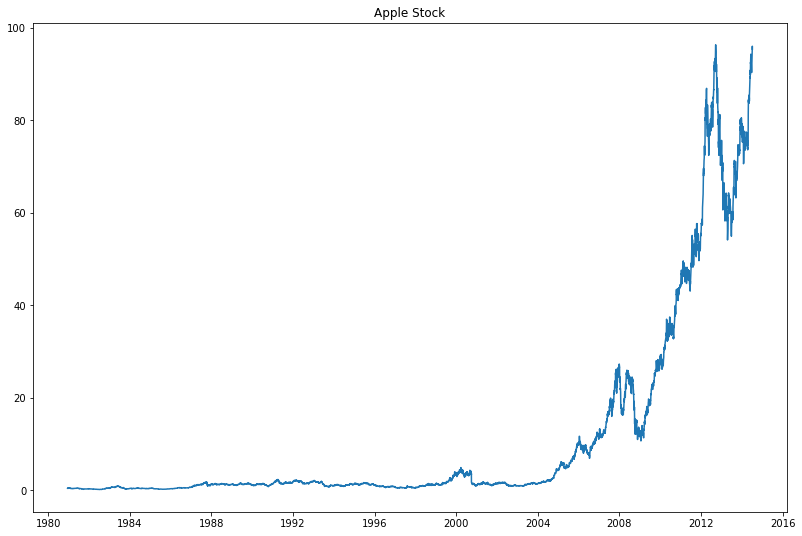

In [36]:
fig=plt.figure(figsize=(13.5,9))
plt.plot(apple['Adj Close'])
plt.title('Apple Stock')

### BONUS: Create your own question and answer it.